# Gekoppelde tanks met zoutoplossingen

Twee grote tanks, elk gevuld met 100 Liter vloeistof, zijn met pijpleidingen aan elkaar verbonden. De vloeistof stroomt van tank A in tank B met een snelheid van 3 L/min en van B in A met 1 L/min.  
Een zoutoplossing met een concentratie van 0.2 kg/L stroomt met een snelheid van 6 L/min tank A in. De oplossing stroomt met een snelheid van 4 L/min tank A uit en verlaat met een snelheid van 2 L/min tank B.

Voor deze opdracht werd er gevraagd om het verloop van de zoutconcentratie in de tanks te plotten.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Om de euler methode nadrukkelijk naar voren te laten komen tijdens het plotten van het verloop in de zoutconcentratie is het proces opgedeeld in stappen:

Om de euler methode nadrukkelijker naar voren te laten komen tijdens het plotten van het verloop in de zoutconcentratie is het proces nu opgedeeld in stappen.  
- Allereerst wordt de tijdstap geupdate.
- De volume van de tank wordt opnieuw berekend.
- De hoeveelheid zout in de tank (in kg) wordt berekend.
- Op basis van het volume en de hoeveelheid zout in de tank wordt de nieuwe concentratie berekend.

Aangezien er meerdere stappen stappen tegelijkertijd uitgevoerd moeten worden heb ik ervoor gekozen om meerdere variabelen aan te maken dan eigenlijk nodig zijn. Dit is gedaan om de leesbaarheid van de code te behouden.

In [2]:
def forward_euler_tanks(n):
    """"""
    # salt concentration in kg/L
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    
    # kg salt in the tank
    m_x = np.zeros(n + 1)
    m_y = np.zeros(n + 1)
    
    # volume in the tank
    v_x = np.zeros(n + 1)
    v_y = np.zeros(n + 1)
    
    # volume at point 0
    v_x[0] = 100
    v_y[0] = 100
    
    # kg salt at point 0
    m_x[0] = 0
    m_y[0] = 20

    # concentration at point 0
    x[0] = m_x[0] / v_x[0]
    y[0] = m_y[0] / v_y[0]
    
    # outside to tank x
    v_o2x = 6
    # tank x to outside
    v_x2o = 4
    # tank x to tank y
    v_x2y = 3
    # tank y to tank x
    v_y2x = 1
    # tank y to outside
    v_y2o = 2
    
    # conc outside to tank x
    c_o2x = 0.2
    
    for step in range(n):
        #update the volumes
        v_x[step + 1] = v_x[step] + v_o2x - v_x2y - v_x2o + v_y2x
        v_y[step + 1] = v_y[step] + v_x2y - v_y2x - v_y2o
        
        # calculate the amount of moving salt
        x_salt_in = (v_o2x * c_o2x) + (v_y2x * y[step])
        x_salt_out = (v_x2y * x[step]) + (v_x2o * x[step])
        
        # update the amount of salt in tank x
        m_x[step + 1] = m_x[step] + x_salt_in - x_salt_out
        
        # calculate the amount of moving salt
        y_salt_in = v_x2y * x[step]
        y_salt_out = (v_y2x * y[step]) + (v_y2o * y[step])
        
        # update the amount of salt in tank y
        m_y[step + 1] = m_y[step] + y_salt_in - y_salt_out
        
        # update the concentration
        x[step + 1] = m_x[step] / v_x[step]
        y[step + 1] = m_y[step] / v_y[step]
    
    return x, y

Om uiteindelijk een goed beeld te krijgen van het verloop van de grafiek wordt deze geplot.

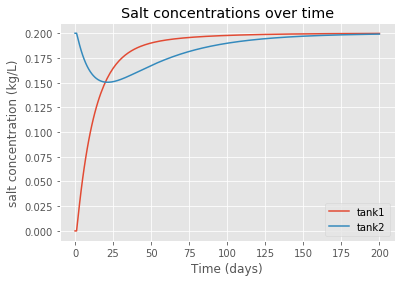

In [3]:
# calculate the outflow
num_steps = 200
conc_tank1, conc_tank2 = forward_euler_tanks(num_steps)
x = [x for x in range(0, num_steps + 1, 1)]

# plot the first tank
plt.plot(x, conc_tank1, label="tank1")

# plot the second tank
plt.plot(x, conc_tank2, label="tank2")

# setting the plot
plt.title("Salt concentrations over time")
plt.xlabel("Time (days)")
plt.ylabel("salt concentration (kg/L)")

# show the plot
plt.legend()
plt.show()